<a href="https://colab.research.google.com/github/Vishalbangari/Spark-Foundation-tasks/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author -Bangari Vishal**

### **GRIP - The Sparks Foundation**

### **Data Science and Bussiness Analytics Intern**

### **Task 6: Prediction using Decision Tree Algorithm.**



### **Algorithm:**

### A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value).

### **Why Decision trees?**
### We have several other algorithms present, so why do we have to choose Decision trees??
### So,it mainly depends on the requirement and apart from this there are many other reasons:
### Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations.
### Decision trees actually make you see the logic for the data to interpret(not like black box algorithms like SVM,NN,etc..)

###For example : if we are classifying bank loan application for a customer, the decision tree may look like this
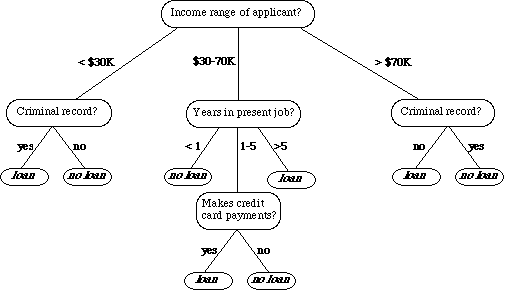

Here we can see the logic how it is making the decision.
It’s simple and clear.

Importing all necessary libraries

In [89]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


Importing given dataset and Exploratory Data Analysis(EDA)

In [90]:
data = pd.read_csv('/content/drive/MyDrive/Sparksfoundation/Task-6-GRIP-Sparks-Foundation-main/Iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [92]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [93]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

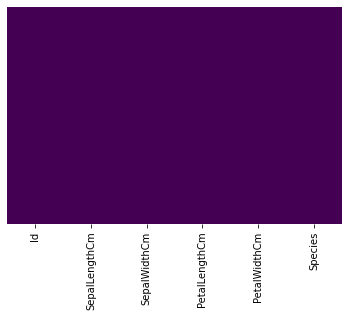

In [94]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

This shows us there are no **Null Values** present in the iris dataset

Plotting data for visualization (EDA)

In [95]:
data = data.set_index("Id")


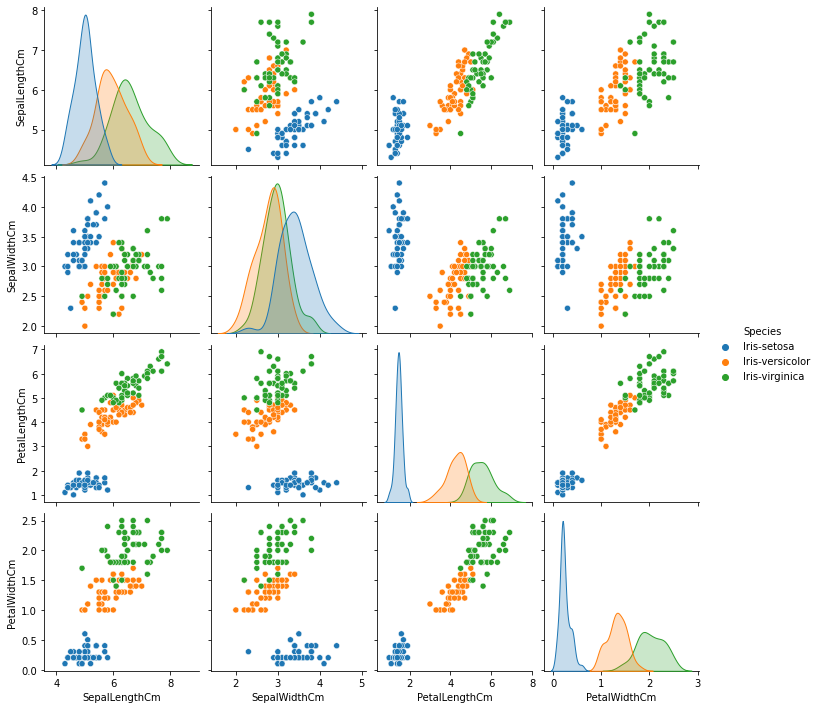

In [72]:
sns.pairplot(data,hue = 'Species')

 Pairplots can be very useful to understand all possible relationships between all the features in our dataset. From this above pairplot, we can see that the clusters of Species 'versicolor' and 'virginica' are closely related, whereas 'setosa' is more distinct.

###Finding the correlation matrix

In [73]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


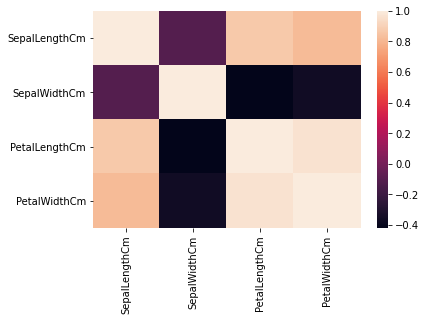

In [74]:
sns.heatmap(data.corr())

We observed that: (i)Petal length is highly related to petal width (ii)Sepal length is not related to sepal width

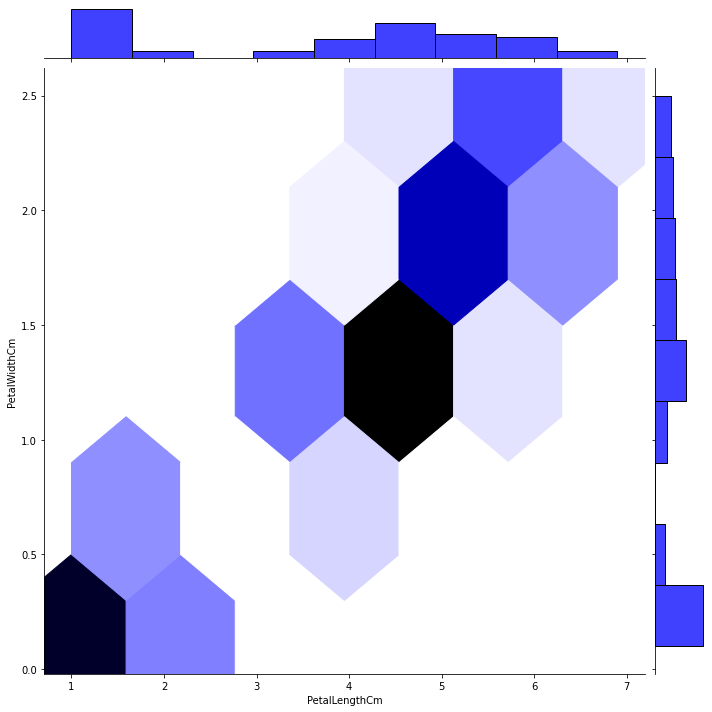

In [75]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=data, height=10,ratio=10, kind='hex',color='blue')
plt.show()

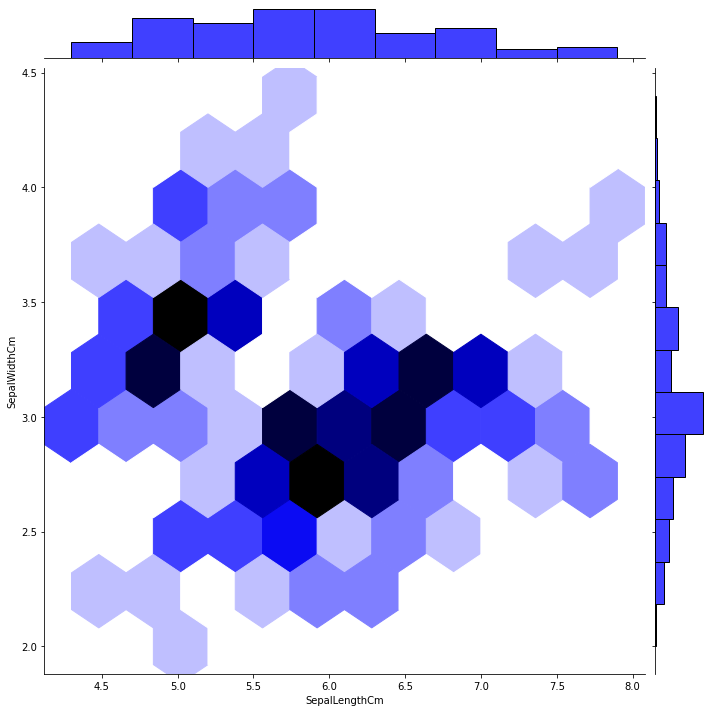

In [76]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data, height=10,ratio=10, kind='hex',color='blue')
plt.show()


From the above jointplot, we can find the major areas of concentration of our data points, the darker hexagons refer to higher concentration, lighter hexagons refer to lesser concentration.

####Data preprocessing

In [77]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 4)

In [78]:
#defining the attributes and labels
X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape

(150, 5)

### **Training the model**
We will now split the data into test and train.

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training data:",X_train.shape)
print("Testing data:",X_test.shape)

Training data: (120, 4)
Testing data: (30, 4)



### Decision Tree Algorithm

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
predictions = dtree.predict(X_test)
print("Classification report:\n",(y_test,predictions))

Classification report:
 (array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0]), array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0]))


In [82]:
import sklearn.metrics as sm
print("Accuracy:",sm.accuracy_score(y_test,predictions))

Accuracy: 1.0


Classification Report and Confusion Matrix

In [83]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix (y_test,predictions)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Testing our model on a random test case

In [84]:
trial = np.array([[7.3,2.9,6.3,1.8]])    ## Predicted label should be Iris-virginica

In [85]:
pred_trial = dtree.predict(trial)
pred_trial

array([2])

**Label 2 belongs to Iris-virginica, hence our prediction is right**

##So, yes here is our final step where we can visualize our final outcome
###Visualizing the decision tree using Graphviz 

[Text(286.15384615384613, 841.2857142857143, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(214.61538461538458, 711.8571428571429, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(357.6923076923077, 711.8571428571429, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(143.07692307692307, 582.4285714285714, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(71.53846153846153, 453.00000000000006, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(214.61538461538458, 453.00000000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(572.3076923076923, 582.4285714285714, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(357.6923076923077, 453.00000000000006, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\

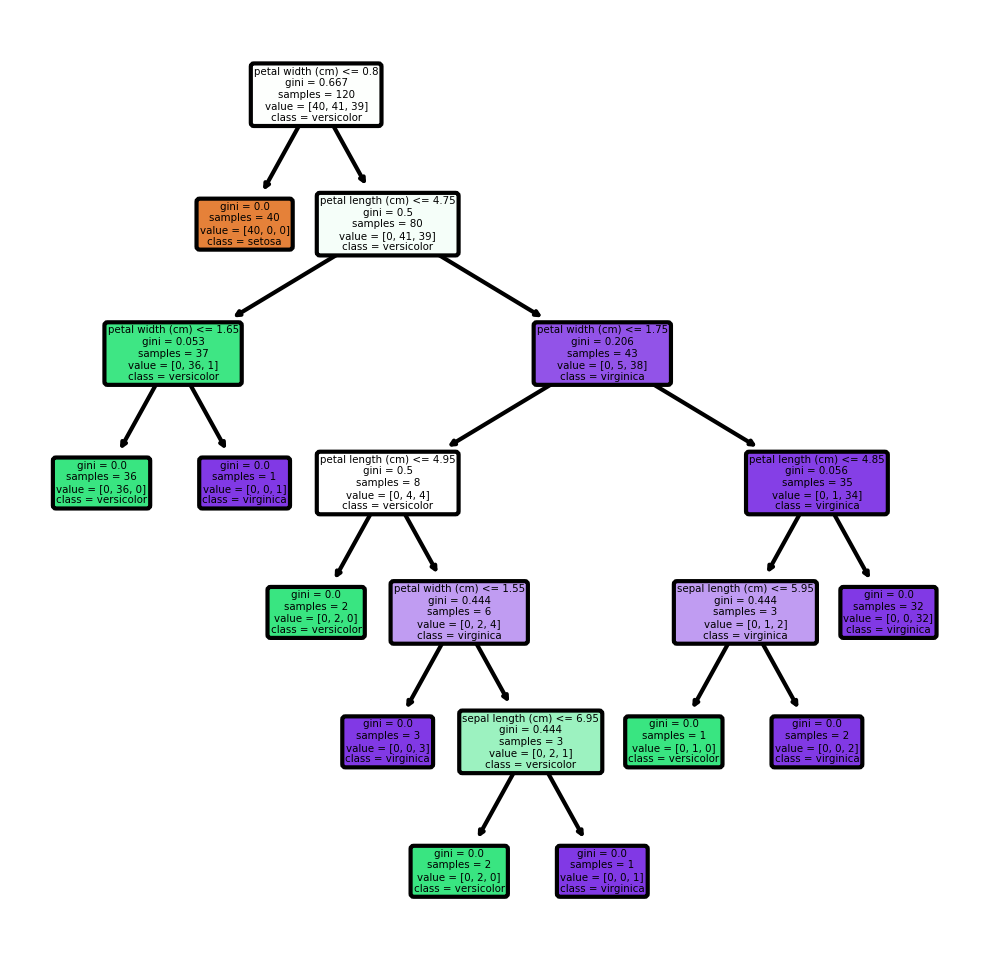

In [87]:
feature_n=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_n=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(dtree,feature_names=feature_n,class_names=class_n,filled='True',rounded='True')

In [88]:
dtree.score(X_test,y_test)


1.0